# Import Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Datasets

In [2]:
df = pd.read_csv("Admission_Predict.csv")

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# "Dimensions of the DataFrame: (rows, columns)"

In [3]:
df.shape

(400, 9)

# Missing Values Count

In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# DataFrame Summary

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


# Statistical Summary of Numerical Columns

In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Pairplot

C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


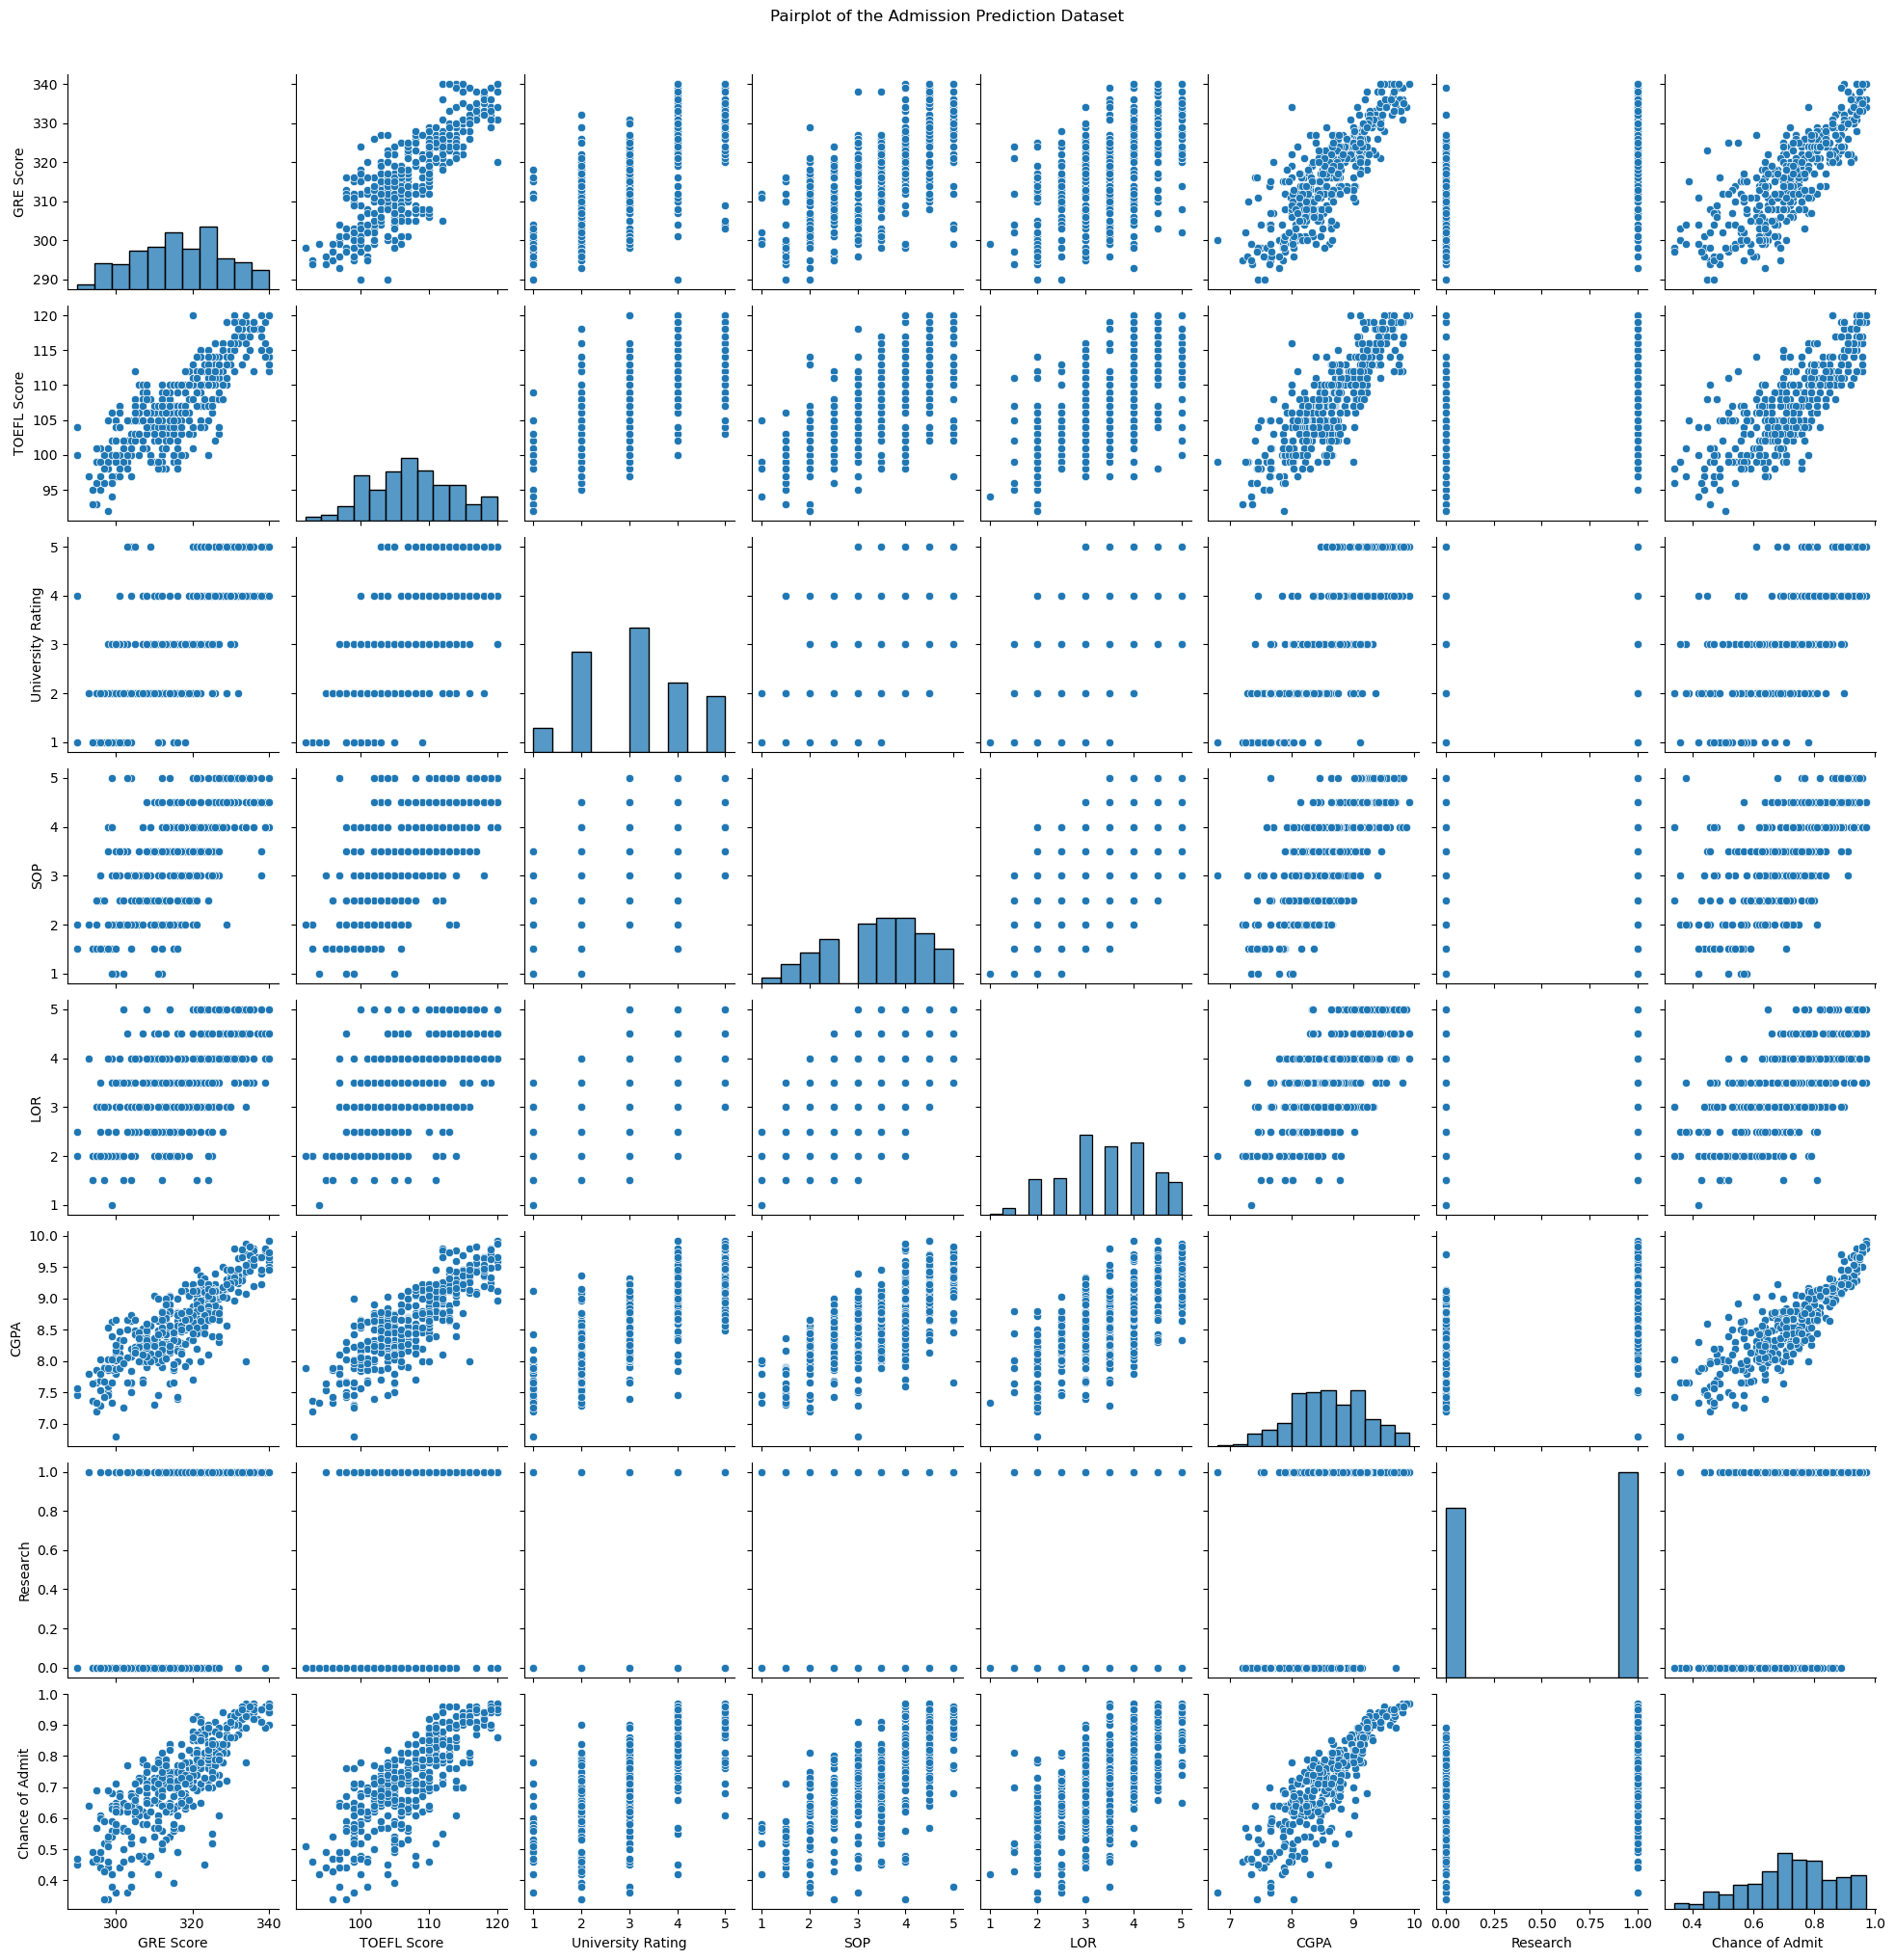

In [44]:
# A pairplot is useful to visualize the pairwise relationships in a dataset.

sns.pairplot(df)
plt.suptitle("Pairplot of the Admission Prediction Dataset", y=1.02)
plt.show()

# Heatmap

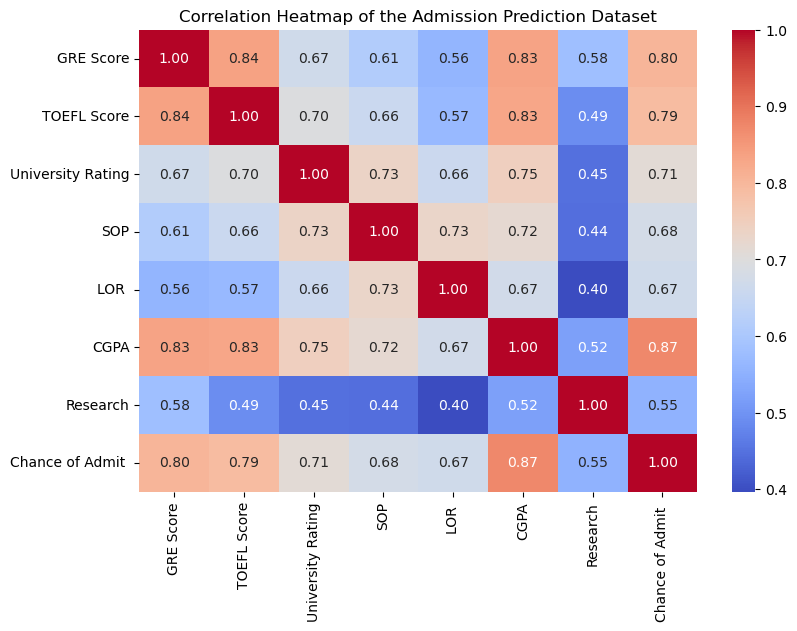

In [56]:
# A heatmap can be used to visualize the correlation between different features.

corr_matrix = df.corr()

plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of the Admission Prediction Dataset")
plt.show()

# Distribution Plot

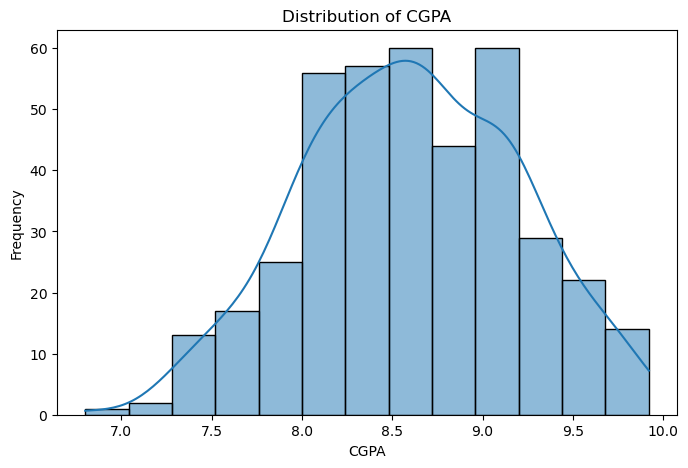

In [57]:
# Distribution plot of CGPA
#A distribution plot helps you visualize the distribution of a single feature.


plt.figure(figsize=(8, 5))
sns.histplot(df['CGPA'], kde=True)
plt.title("Distribution of CGPA")
plt.xlabel("CGPA")
plt.ylabel("Frequency")
plt.show()

# Boxplot

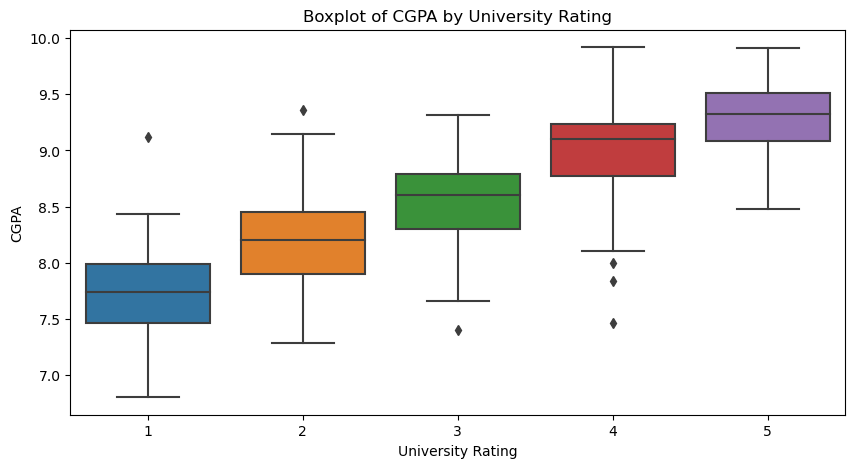

In [58]:
# Boxplot of CGPA by University Rating
# A boxplot is useful for visualizing the spread and outliers in the data.

plt.figure(figsize=(10, 5))
sns.boxplot(x='University Rating', y='CGPA', data=df)
plt.title("Boxplot of CGPA by University Rating")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

# Scatter plot

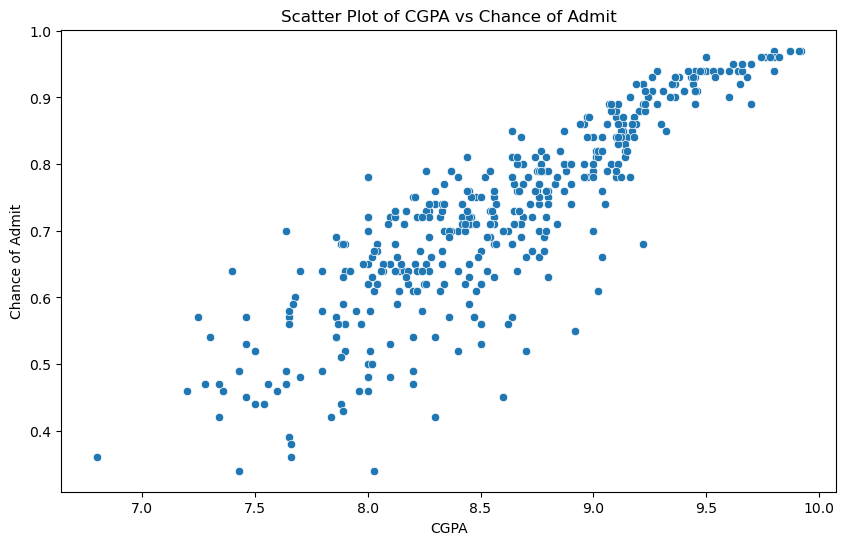

In [60]:
# Scatter plot of CGPA vs Chance of Admit
#A scatter plot can be used to show the relationship between two continuous variables.


plt.figure(figsize=(10, 6))
sns.scatterplot(x='CGPA', y='Chance of Admit ', data=df)
plt.title("Scatter Plot of CGPA vs Chance of Admit")
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")
plt.show()

# Violin Plot

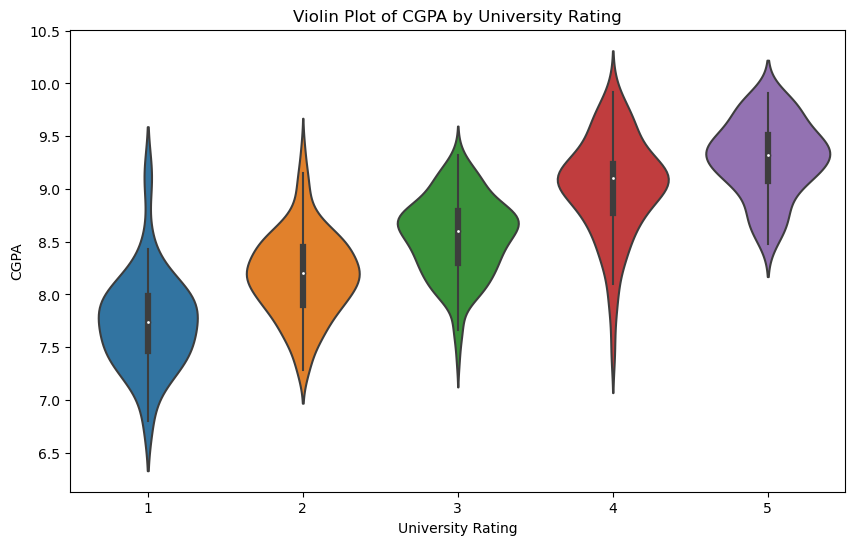

In [62]:
#A violin plot is useful for visualizing the distribution of data and its probability density.

plt.figure(figsize=(10, 6))
sns.violinplot(x='University Rating', y='CGPA', data=df)
plt.title("Violin Plot of CGPA by University Rating")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

# All Columns

In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

# Unnecessary features drop

In [8]:
df = df.drop('Serial No.' , axis = 1)

# Now All Columns After Drop

In [9]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# Feature and Target Variable Selection

In [10]:
X = df.drop('Chance of Admit ' , axis = 1)

y = df['Chance of Admit ']

# Train-Test Split for Model Evaluation

In [11]:
from sklearn.model_selection import train_test_split , cross_val_score

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

# Polynomial Feature Transformation for Model Enhancement

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardization of Polynomial Features

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train_poly)
X_test_sc = sc.fit_transform(X_test_poly)

# All possible Supervised Machine Algorithms are apply 

In [15]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error , mean_absolute_error

# Linear Regression Model Performance on Scaled Polynomial Features

In [16]:
lr = LinearRegression()

lr.fit(X_train_sc , y_train)

lr.score(X_train_sc , y_train) * 100 , lr.score(X_test_sc , y_test) * 100  

(81.70449180109058, 82.66803761992114)

# Evaluation Metrics

In [17]:
mean_squared_error(y_test , lr.predict(X_test_sc)) , mean_absolute_error(y_test , lr.predict(X_test_sc))

(0.004475694932147566, 0.04885187907165771)

# Scaled PredictedTest Features 

In [18]:
X_test_sc

array([[ 0.        , -1.28554291, -0.52594327, ..., -0.84905285,
         0.64787537,  0.83793058],
       [ 0.        , -0.46410974, -0.84713   , ..., -0.04153117,
         0.76542941,  0.83793058],
       [ 0.        ,  1.91804645,  1.07999038, ...,  1.58092474,
         0.98245226,  0.83793058],
       ...,
       [ 0.        , -1.28554291, -1.48950346, ..., -0.98372937,
         0.62752947,  0.83793058],
       [ 0.        ,  1.01446996,  1.8829572 , ...,  0.81609926,
         0.88298345,  0.83793058],
       [ 0.        , -0.29982311,  0.27702355, ...,  0.54687595,
        -1.18777622, -1.19341628]])

# Predictions

In [19]:
y_pred = lr.predict(X_test_sc)

In [20]:
y_pred

array([0.6212025 , 0.63913262, 0.93591122, 0.80302396, 0.51519705,
       0.9386814 , 0.52553697, 0.52160373, 0.6534766 , 0.8611803 ,
       0.7079515 , 0.92268775, 0.56844184, 0.89453943, 0.68481695,
       0.71028732, 0.66449335, 0.46160696, 0.6709689 , 0.98996736,
       0.58343152, 0.64529736, 0.66897713, 0.52885762, 0.94803204,
       0.80749556, 0.67288009, 0.56606139, 0.69234325, 0.82083164,
       0.8082651 , 0.96450926, 0.66062668, 0.4203899 , 0.67272786,
       0.63839706, 0.68423723, 0.64700335, 0.62322809, 0.84010984,
       0.7354503 , 0.61220365, 0.77716774, 0.97283874, 0.84352225,
       0.82552328, 0.9560723 , 0.66622941, 0.93929089, 0.86996287,
       0.91116955, 0.69933636, 0.78073963, 0.97078973, 0.58875684,
       0.58445087, 0.70241169, 0.86060645, 0.54646761, 0.85072704,
       0.64408448, 0.64177972, 0.71564081, 0.40297805, 0.63780523,
       0.69283375, 0.58674721, 0.83598679, 0.84921083, 0.78032977,
       0.68586975, 0.78033314, 0.91701251, 0.82235262, 0.52077

# Actual Test

In [21]:
y_test

209    0.68
280    0.68
33     0.90
210    0.79
93     0.44
       ... 
246    0.72
227    0.64
369    0.67
176    0.90
289    0.79
Name: Chance of Admit , Length: 80, dtype: float64

# Scatter Plot of Actual vs. Predicted Chance of Admit

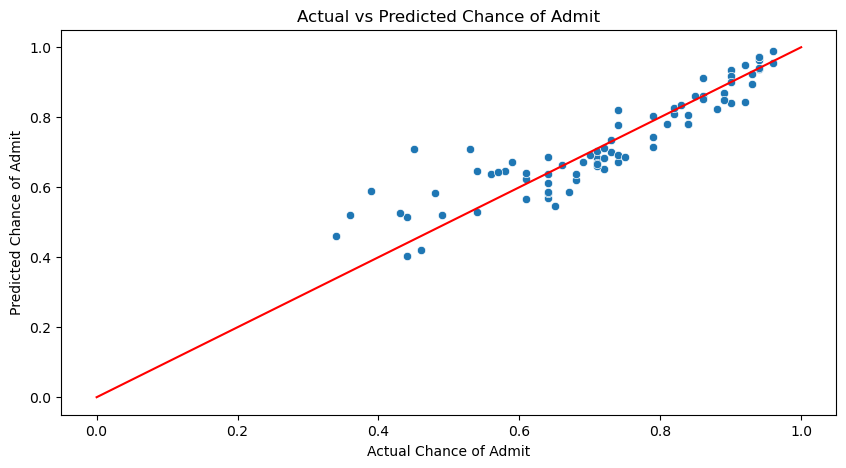

In [63]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=[0, 1], y=[0, 1], color='red')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Actual vs Predicted Chance of Admit')
plt.show()

# New Data for Prediction If Company Provide 

In [65]:
new_data = pd.DataFrame({
    'GRE Score': [324],
    'TOEFL Score': [107],
    'University Rating': [4],
    'SOP': [4.0],
    'LOR ': [4.5],
    'CGPA': [8.87],
    'Research': [1]
})

# Polynomial Feature Transformation for New Data

In [66]:
new_data_poly = poly.transform(new_data)

# Standardization of Polynomial Features for New Data

In [67]:
new_data_poly_scaled = sc.transform(new_data_poly)

# Predicted Chance of Admit for New Data

In [68]:
new_predictions = lr.predict(new_data_poly_scaled)
new_predictions

array([0.80463334])

# Through Cross Validation

In [26]:
# after train test like as above

# Pipeline for Polynomial Feature Transformation, Scaling, and Linear Regression

In [27]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Cross-Validation Scores for Pipeline with 5-Fold

In [28]:
# Perform cross-validation

cv_scores = cross_val_score(pipeline, X , y , cv=5 , scoring = 'neg_mean_squared_error')
cv_scores = -cv_scores  # Convert negative MSE to positive MSE


# Pipeline on Training Data

In [29]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

# Pipeline Performance Scores

In [30]:
train_score = pipeline.score(X_train, y_train) * 100
test_score = pipeline.score(X_test, y_test) * 100

In [ ]:
print(f"Train Score: {train_score}%")
print(f"Test Score: {test_score}%")

# Evaluation Metrics

In [31]:
mse = mean_squared_error(y_test, pipeline.predict(X_test))
mae = mean_absolute_error(y_test, pipeline.predict(X_test))

In [32]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Train Score: 81.70449180109058%
Test Score: 82.53834707740504%
Mean Squared Error: 0.004509185387016888
Mean Absolute Error: 0.046111600113210444


# Cross-Validation Mean and Standard Deviation of MSE

In [33]:
print(f"Cross-Validation Mean MSE: {cv_scores.mean()}")
print(f"Cross-Validation Std MSE: {cv_scores.std()}")

Cross-Validation Mean MSE: 0.010152735484353026
Cross-Validation Std MSE: 0.012518954384678267


# Predict new data

In [34]:

new_data = pd.DataFrame({
    'GRE Score': [324],
    'TOEFL Score': [107],
    'University Rating': [4],
    'SOP': [4.0],
    'LOR ': [4.5],
    'CGPA': [8.87],
    'Research': [1]
})

# Predicted Chance of Admit for New Data

In [35]:
new_predictions = pipeline.predict(new_data)
print(f"New Data Predictions: {new_predictions}")

New Data Predictions: [0.81382206]


# *Thank YOU To All Follow My GitHub Account @ZeshanFareed*